# PBxplore API cookbook --- Visualize protein deformability

Protein Blocks are great tools to study protein deformability. Indeed, if the block assigned to a residue changes between two frames of a trajectory, it represents a local deformation of the protein rather than the displacement of the residue.

The PBxplore API allows to visualize Protein Block variability throughout a molecular dynamics simulation trajectory.

In [1]:
from __future__ import print_function, division
from pprint import pprint
from IPython.display import Image, display
import matplotlib.pyplot as plt
%cd ../../../
%matplotlib inline

/Users/jon/dev/PBxplore


In [2]:
import pbxplore as pbx

Here we will look at a molecular dynamics simulation of the barstar. As we will analyse Protein Block sequences, we first need to assign these sequences for each frame of the trajectory.

In [3]:
# Assign PB sequences for all frames of a trajectory
trajectory = 'demo2/barstar_md_traj.xtc'
topology = 'demo2/barstar_md_traj.gro'
sequences = []
for chain_name, chain in pbx.chains_from_trajectory(trajectory, topology):
    dihedrals = chain.get_phi_psi_angles()
    pb_seq = pbx.assign(dihedrals)
    sequences.append(pb_seq)

## Block occurences per position

The basic information we need to analyse protein deformability is the count of occurences of each PB for each position throughout the trajectory. This occurence matrix can be calculated with the :func:`pbxplore.analysis.count_matrix` function.

In [4]:
count_matrix = pbx.analysis.count_matrix(sequences)

``count_matrix`` is a numpy array with one row per PB and one column per position. In each cell is the number of time a position was assigned to a PB.

We can visualize ``count_matrix`` using Matplotlib as any 2D numpy array.

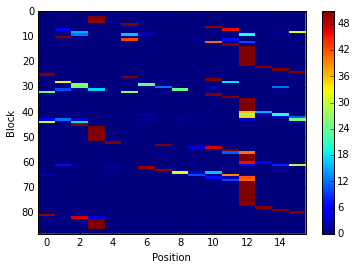

In [16]:
im = plt.imshow(count_matrix, interpolation='none', aspect='auto')
plt.colorbar(im)
plt.xlabel('Position')
plt.ylabel('Block')

PBxplore provides the :func:`pbxplore.analysis.plot_map` function to ease the visualization of the occurence matrix.

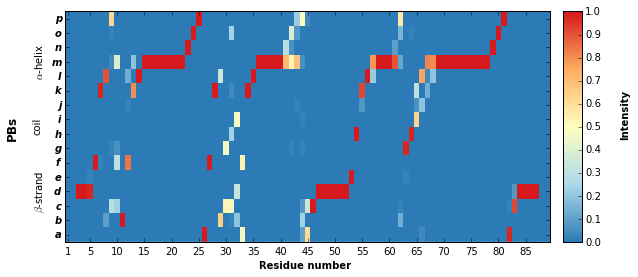

In [6]:
pbx.analysis.plot_map('map.png', count_matrix)
!rm map.png

The :func:`pbxplore.analysis.plot_map` helper has a ``residue_min`` and a ``residue_max`` optional arguments to display only part of the matrix. These two arguments can be pass to all PBxplore functions that produce a figure.

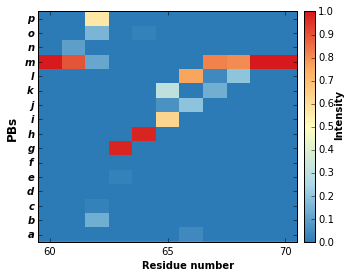

In [15]:
pbx.analysis.plot_map('map.png', count_matrix,
                      residue_min=60, residue_max=70)
!rm map.png

Note that matrix in the the figure produced by :func:`pbxplore.analysis.plot_map` is normalized so as the sum of each column is 1. The matrix can be normalized with the :func:`pbxplore.analysis.compute_freq_matrix`.

In [7]:
freq_matrix = pbx.analysis.compute_freq_matrix(count_matrix)

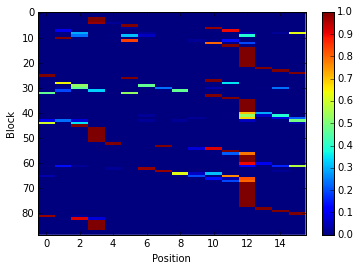

In [17]:
im = plt.imshow(freq_matrix, interpolation='none', aspect='auto')
plt.colorbar(im)
plt.xlabel('Position')
plt.ylabel('Block')

## Protein Block entropy

The $N_{eq}$ is a measure of variability based on the count matrix calculated above. It can be computed with the :func:`pbxplore.analysis.compute_neq` function.

In [9]:
neq_by_position = pbx.analysis.compute_neq(count_matrix)

``neq_by_position`` is a 1D numpy array with the $N_{eq}$ for each residue.

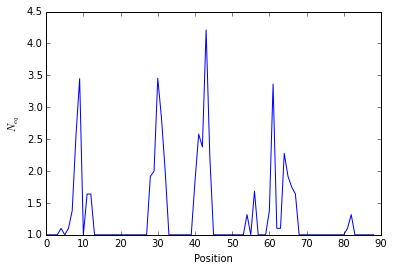

In [10]:
plt.plot(neq_by_position)
plt.xlabel('Position')
plt.ylabel('$N_{eq}$')

The :func:`pbxplore.analysis.plot_neq` helper ease the plotting of the $N_{eq}$.

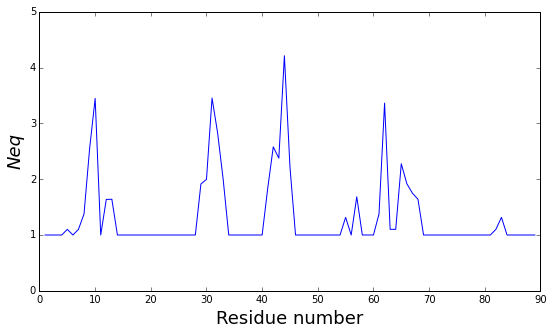

In [11]:
pbx.analysis.plot_neq('neq.png', neq_by_position)
!rm neq.png

The ``residue_min`` and ``residue_max`` arguments are available.

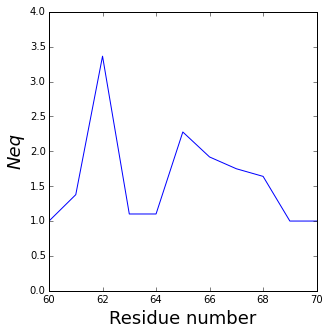

In [14]:
pbx.analysis.plot_neq('neq.png', neq_by_position,
                      residue_min=60, residue_max=70)
!rm neq.png

## Display PB variability as a logo

In [ ]:
pbx.analysis.generate_weblogo('logo.png', count_matrix)
display(Image('logo.png'))
!rm logo.png

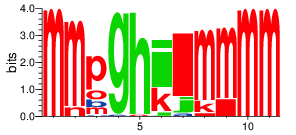

In [13]:
pbx.analysis.generate_weblogo('logo.png', count_matrix,
                              residue_min=60, residue_max=70)
display(Image('logo.png'))
!rm logo.png